In [2]:
import numpy as np
import matplotlib.pyplot as plt
from parrack import dynamics_solve

# A) Population Model

### 1A) Generate Solutions and Demonstrate Effect of Step Size
**Instructions:** Demonstrate that as long as the step size is chosen "sufficiently small," the numerical solution can be made to agree with the exact solution as closely as one desires."

*To do this let's show a deomstration that A) small dt gives reasonable accuaracy and B) further decreasing dt converges toward the analytical solution (reduces error).*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from parrack import dynamics_solve 

# Parameters for simulation
t_0 = 0
t_end = 100
P0 = 1000
B = 0.1
D = 0.05

# Initial N
N = 1000

# Create a colormap for the gradient
colors = plt.cm.Blues(np.linspace(0.3, 1, 4))

# Lists to store maximum errors for each method and step sizes
max_errors_euler = []
max_errors_rk2 = []
max_errors_rk4 = []
step_sizes = []

for i in range(3):  # We'll do this for different step sizes
    dt = (t_end - t_0) / N
    step_sizes.append(dt)
    
    t = np.linspace(t_0, t_end, N+1)
    P_analytical = P0 * np.exp((B - D) * t)

    # Compute numerical solutions with the current N
    T_euler, P_euler = dynamics_solve(lambda t, P: (B - D) * P, t_0=t_0, s_0=P0, dt=dt, N=N, method="Euler")
    T_rk2, P_rk2 = dynamics_solve(lambda t, P: (B - D) * P, t_0=t_0, s_0=P0, dt=dt, N=N, method="RK2")
    T_rk4, P_rk4 = dynamics_solve(lambda t, P: (B - D) * P, t_0=t_0, s_0=P0, dt=dt, N=N, method="RK4")
    
    # Calculate errors for the current N
    error_euler = np.abs(P_euler - P_analytical)
    error_rk2 = np.abs(P_rk2 - P_analytical)
    error_rk4 = np.abs(P_rk4 - P_analytical)

    # Store maximum errors
    max_errors_euler.append(np.max(error_euler))
    max_errors_rk2.append(np.max(error_rk2))
    max_errors_rk4.append(np.max(error_rk4))

    # Plotting the solutions
    plt.figure(figsize=(10, 6))
    plt.plot(t, P_analytical, label='Analytical', color=colors[0])
    plt.plot(T_euler, P_euler, label="Euler's method", linestyle='--', color=colors[1], dashes=(5, 5))
    plt.plot(T_rk2, P_rk2, label='RK2', linestyle='--', color=colors[2], dashes=(5, 5))
    plt.plot(T_rk4, P_rk4, label='RK4', linestyle='--', color=colors[3], dashes=(5, 5))
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title(f'Population model with dt={dt:.2e}')
    plt.show()
    
    # Plotting the errors
    plt.figure(figsize=(10, 6))
    plt.plot(t, error_euler, label="Euler's error", color=colors[1])
    plt.plot(t, error_rk2, label="RK2's error", color=colors[2])
    plt.plot(t, error_rk4, label="RK4's error", color=colors[3])
    plt.yscale('log')  # since we're interested in orders of magnitude
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.legend()
    plt.title(f'Error in numerical solutions with dt={dt:.2e}')
    plt.show()
    
    N *= 2  # Double N for the next iteration, which halves the step size

# New plot after the loop
plt.figure(figsize=(10, 6))
plt.loglog(step_sizes, max_errors_euler, marker='o', label="Euler's method", color=colors[1])
plt.loglog(step_sizes, max_errors_rk2, marker='o', label="RK2", color=colors[2])
plt.loglog(step_sizes, max_errors_rk4, marker='o', label="RK4", color=colors[3])
plt.gca().invert_xaxis()  # smaller step size on the right
plt.xlabel('Step size (dt)')
plt.ylabel('Maximum Error')
plt.title('Error vs Step Size for Each Method')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

NameError: name 't' is not defined

### 2A
**Instructions:** Comment on what "sufficiently small" means for this system.  Is there a natural time scale in the problem to which the step size can be compared?  If the step size is small compared to this time scale, do the simulations work well?

*In the context of numerical simulations, particularly those involving the integration of differential equations, "sufficiently small" in reference to the step size (dt) generally means small enough to accurately capture the essential dynamics of the system without introducing significant numerical error. The choice of "sufficiently small" is crucial: too large a step size may miss important dynamics or introduce unacceptable errors, while too small a step size can drastically increase computation time without meaningful gains in accuracy.*

*τ=1/∣B−D∣, represents a characteristic time scale of the system. Since this models population the amount of time to ellapse before a significant change in the total population will depend on the rates at which members of the population die and are born. To accurately model the behaviour of the population over time our time step dt should be a fraction of this natural time scale to ensure that our numerical approximation is accurate.*

### 3A
**Instructions:** Show through examples that Euler's method is first order, RK2 is second order, and RK4 is fourth order.  Recall that the order of the method refers to how its global truncation error depends on the step size.

*To do this we can calculate the slopes on the log plot of Error vs Step Size. We expect to find the slopes to be approximately 1 for Euler, 2 for rk2, and 4 for rk4. This corresponds to the global truncation error of the method.* 

In [5]:
# Convert lists to numpy arrays
max_errors_euler = np.array(max_errors_euler)
max_errors_rk2 = np.array(max_errors_rk2)
max_errors_rk4 = np.array(max_errors_rk4)
step_sizes = np.array(step_sizes)

# Calculate the slopes using a simple difference quotient on the log-log data
slopes_euler = np.diff(np.log(max_errors_euler)) / np.diff(np.log(step_sizes))
slopes_rk2 = np.diff(np.log(max_errors_rk2)) / np.diff(np.log(step_sizes))
slopes_rk4 = np.diff(np.log(max_errors_rk4)) / np.diff(np.log(step_sizes))

# Now, take the average of these slopes
average_slope_euler = np.mean(slopes_euler)
average_slope_rk2 = np.mean(slopes_rk2)
average_slope_rk4 = np.mean(slopes_rk4)

print(f"Average slope for Euler's method: {average_slope_euler:.2f}")
print(f"Average slope for RK2: {average_slope_rk2:.2f}")
print(f"Average slope for RK4: {average_slope_rk4:.2f}")


Average slope for Euler's method: 0.99
Average slope for RK2: 2.00
Average slope for RK4: 3.95


# B Analysis of a more general population model

### 1B 
**Instructions:** How many roots does the function $f(t,P)$ have in the variable $P$ (values of $P$ at which $f$ is zero)?  What are these roots?  If the population's value equals one of these roots at some moment in time, then what will the population be forever after?

*There are two zeroes/roots in the function. Zeroes of the function represents equilibriums in the population wherein P_dot(t) = 0*

### 2B
**Instructions:** When $P$ is in the open interval $(0, K)$, what is the sign of $f$?  What does this imply about the population growth rate?

*The sign of f is positive assuming R and K are possitive (or both negative technically but this isn't physical in the model).*

*As P -> K, f is positive but decreasing, representing a curtailment in the growth of the population as the population approaches its carrying capacity K.*

### 3B
**Instructions:** When $P$ is in the open interval $(K, \infty)$, what is the sign of $f$? What does this imply about the population growth rate?

*The sign is negative, this implies the population is decreasing.*

### 4B
**Instructions:** Based on your observations from the last three questions, describe qualitatively what you believe the population as a function of time will look like for each of the following initial conditions:
1. $P_0 = 0$
1. $0 < P_0 < K$
1. $P_0 = K$
1. $K < P_0$


*1. The population will remain at zero forever. Without individuals to contribute to growth, the population cannot increase from zero.*

*2. The population will grow until it reaches capacity, K at which point it will remain at K.*

*3. The population remains constant at K*

*4. The population will decrease until it reaches K then remain at K*

### 5B
**Instructions:** 1. Based on your descriptions in the last part, give a physical interpretation for the parameter $K$.  Hint: think about the availability of resources in the environment in which the population lives.
1. Consider the following parameter values:
$$
    R = 0.2, \qquad K = 10^6
$$
Plot the resulting function $f(t,P)$ for $t = 0.0$ as a function of $P$ over the interval $[0, 2\times 10^6]$ to verify that the roots are in the places you expected.

*K represents the carrying capacity of the environment. It is the ability of the environement to support a population with resources.*

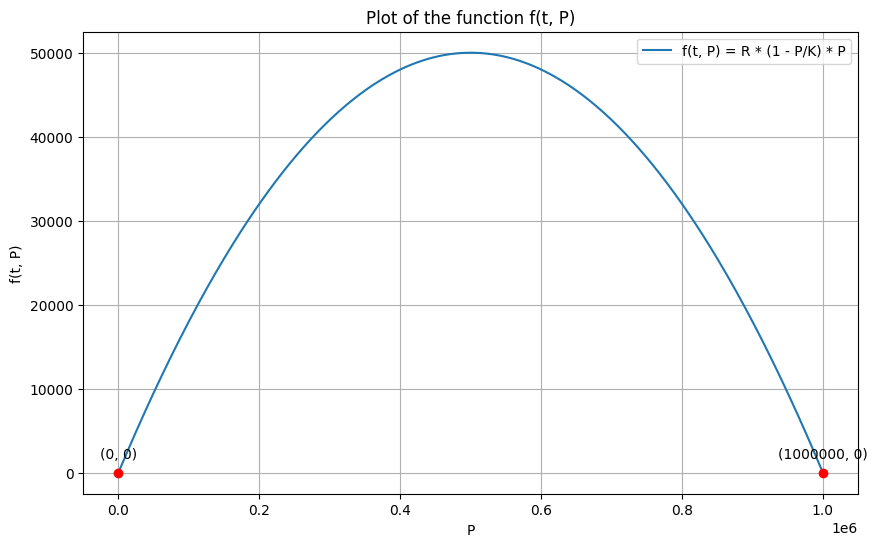

In [6]:
# Parameters for the model
R = 0.2  # Intrinsic growth rate
K = 10**6  # Carrying capacity

'''Now a philosophy paper I read about R and K specialists 
suddenly makes sense they're population growth/protection strategies'''

# Function representing the model
def f(P):
    return R * (1 - P/K) * P

# Create a range of values for P
P_values = np.linspace(0, K, 400)

# Calculate f for all P values
f_values = f(P_values)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(P_values, f_values, label='f(t, P) = R * (1 - P/K) * P')
plt.title('Plot of the function f(t, P)')
plt.xlabel('P')
plt.ylabel('f(t, P)')

# Mark the zeroes
plt.plot([0, K], [0, 0], 'ro')  # 'ro' plots red circles
for xy in [(0, 0), (K, 0)]:
    plt.annotate(f'({xy[0]}, {xy[1]})', xy=xy, textcoords='offset points', xytext=(0,10), ha='center')

plt.grid(True)
plt.legend()
plt.show()

*roots as expected at P = 0 and a P = K*

### 6B
**Instructions:** 1. `Use the dynamics_solve` function to numerically determine the evolution of the population in time for many population values satisfying the four initial conditions above, and plot all of these populations as a function of time on the same plot.  Make sure to choose the step size small compared to any relevant natural time scales in the problem so that you can be confident that your numerical solution is accurate, but also make sure that the number of steps is large enough that you're able to observe the evolution of the system for long enough that its salient qualitative features are apparent.  You may also want to play around with the step size a bit and make sure that the solution you are getting is insensitive to the step size when its of a certain smallness or smaller -- this is one indication that the method has converged on the correct solution.
1. Comment on whether or not your numerical solutions agree with your predictions.  Explain what, if anything, is a characteristic of the numerical solution that you didn't anticipate.

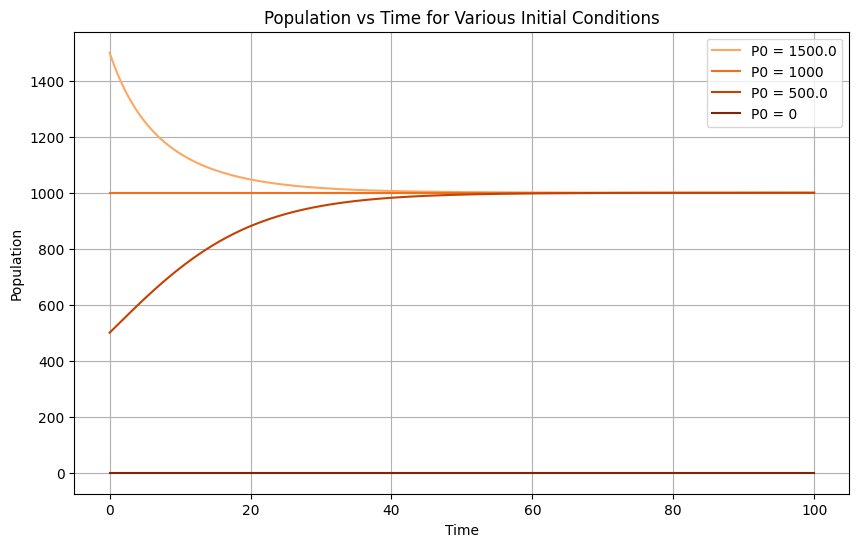

In [7]:
# Define parameters
R = 0.1  # Rate of population change
K = 1000  # Carrying capacity
t_0 = 0.0  # Initial time
t_end = 100  # End time
dt = 0.1  # Time step, small compared to the natural time scale of the problem
N = int((t_end - t_0) / dt)  # Number of steps

# Function defining the population change
def f_B(t, P):
    return R * P * (1 - P / K)

# Initial conditions
initial_conditions = [1.5*K, K, K/2, 0]

# Create a colormap for the gradient
colors = plt.cm.Oranges(np.linspace(0.4, 1, 4))

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Simulate and plot for each initial condition
for i, P0 in enumerate(initial_conditions):
    T, P = dynamics_solve(f_B, Dim=1, t_0=t_0, s_0=P0, dt=dt, N=N, method="RK4")
    plt.plot(T, P, label=f'P0 = {P0}', color=colors[i])

# Add labels and legend
plt.title('Population vs Time for Various Initial Conditions')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

*This plot does agree with expectations.*

# C. Analysis of an even more general population model

### 1C
**Instructions:** Consider the following parameter values henceforth in this problem:
$$
  R = 0.2, \qquad K = 1000, \qquad C = 40, \qquad  P_c = 100.
$$

In [8]:
# Parameter initialization
R = 0.2    # Intrinsic growth rate
K = 1000   # Carrying capacity of the environment
C = 40     # Competition/negative feedback
P_c = 100  # Critical population

### 2C 
**Instructions:** Plot the function $f(t, P)$ as a function of $P$ over the interval $[0, 1000]$(you can set $t$ to any value, like $0$, since the function has no dependence on $t$).  How many real roots does the function have?

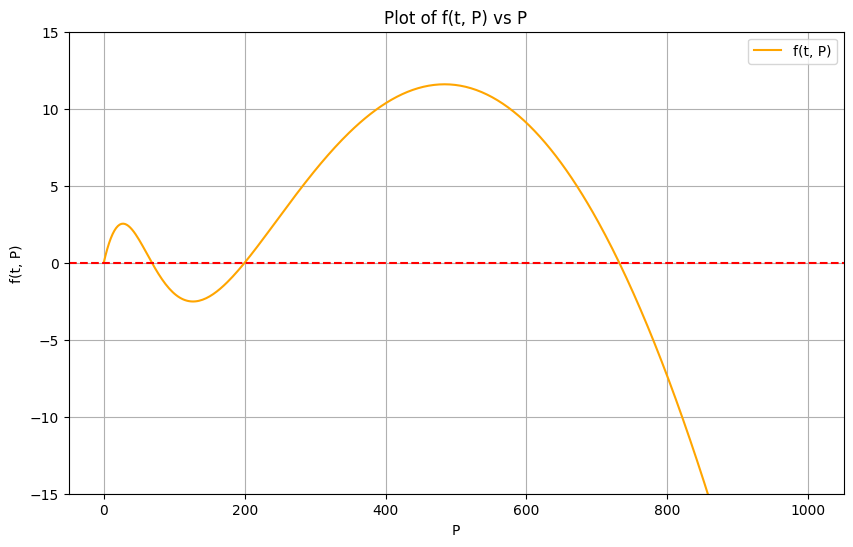

In [9]:
# Define the function f(t, P) with the new model
def f_C(P, t=0):
    return R * (1 - P/K) * P - C * P**2 / (P_c**2 + P**2)


# Create an array of P values
P_values = np.linspace(0, 1000, 400)  # 400 points for smoothness
f_values = f_C(P_values, 0)  # We can set t=0 since there's no t dependence

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(P_values, f_values, label="f(t, P)", color='orange') 
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 to show roots
plt.ylim(-15, 15)  # Set y-axis limits
plt.title("Plot of f(t, P) vs P")
plt.xlabel("P")
plt.ylabel("f(t, P)")
plt.legend()
plt.grid(True)
plt.show()


### 3C
**Instructions:** Import the scipy function that employs the so-called Newton-Raphson root finding method as follows:

        from scipy.optimize import newton
    
    Read the documentation on this `newton` function, then use it to find the roots of $f$ in the variable $P$.

In [10]:
from scipy.optimize import newton

# Array of initial guesses
initial_guesses = [0, 50, 170, 750]

# Find the root for each initial guess
roots = []
for guess in initial_guesses:
    root = newton(f_C, guess, args=(0,))
    roots.append(root)

# Printing the roots
roots = np.array(roots)  # Convert list to numpy array for uniformity
print("Roots found:", roots)

Roots found: [  0.          68.33752096 200.         731.66247904]


### 4C
**Instructions:** The roots of  𝑓
  partition the real line into 4 regions whose boundary points are the roots. Articulate what these regions are.
  
*The regions represent different projections of population evolution based on initial population. Given initial population P, the plot shows how the population evolves over time. If the the population encounters a zero of the function its rate of change becomes zero, the population has reached equilibrium.*

### 5C
**Instructions:** Predict what the population as a function of time will look like with an initial population residing in each of these four regions, and justify your predictions.

*The behaviour of the function determines the evolution of the population over time, while f is positive the population increases with time. while f is negative the population declines. If f reaches 0 the change in the population with time comes to an end.*

*Region 1 (0 < P < 68.34)
The population grows until but the rate of growth declines as it approaches the first non zero root of the function, about 68.34. It stabalizes thereafter and remains constant.* 

*Region 2 (68.34 < P < 200)
The population declines until it reaches the 1st root around 68.34.*

*Region 3 (200 < P < 731.66)
The population grows until it reaches the 731.66 mark.*

*Region 4 (731.66 < P)
The population declines until it reaches the 731.66 mark.*

### 6C
**Instructions:** Use the dynamics_solve function to numerically determine the evolution of the population in time for many population values satisfying initial conditions in each of the four regions defined by the roots of  𝑓
 , and plot all of these populations as a function of time on the same plot. Make sure to choose the step size small compared to any relevant natural time scales in the problem so that you can be confident that your numerical solution is accurate, but also make sure that the number of steps is large enough that you're able to observe the evolution of the system for long enough that its salient qualitative features are apparent. You may also want to play around with the step size a bit and make sure that the solution you are getting is insensitive to the step size when its of a certain smallness or smaller -- this is one indication that the method has converged on the correct solution.


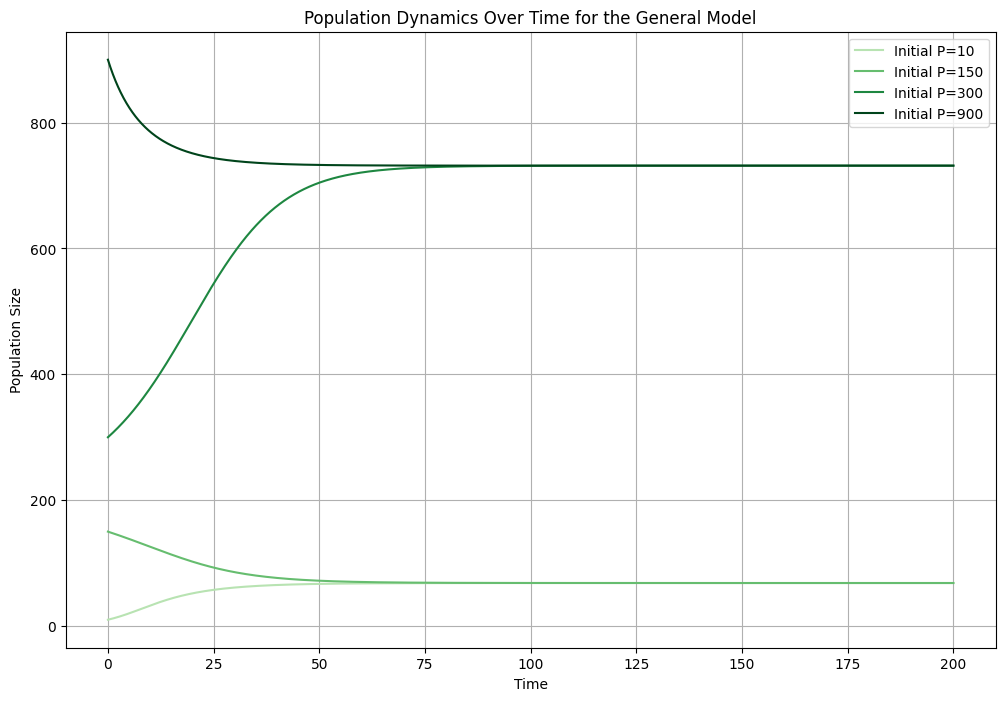

In [11]:
t_0 = 0.0  # Initial time
t_end = 200  # End time
dt = 0.1  
N = int((t_end - t_0) / dt)  

# Defining the function f_C
def f_C(t, P):
    return R * (1 - P/K) * P - C * P**2 / (P_c**2 + P**2)

# Given initial conditions
initial_conditions_C = [10, 150, 300, 900]

# Plot setup
plt.figure(figsize=(12, 8))

# Create a colormap for the gradient
colors = plt.cm.Greens(np.linspace(0.3, 1, 4))

# Simulating the dynamics for each initial condition and plotting
for i, P0 in enumerate(initial_conditions_C):
    T, S = dynamics_solve(f_C, Dim=1, t_0=0, s_0=P0, dt=dt, N=N, method="RK4")
    plt.plot(T, S, label=f'Initial P={P0}', color=colors[i])

# Plot aesthetics
plt.title('Population Dynamics Over Time for the General Model')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid(True)
plt.show()

### 7C
**Instructions:** Comment on whether or not your numerical solutions agree with your predictions. Explain what, if anything, is a characteristic of the numerical solution that you didn't anticipate.

*The solutions do agree with my predictions. I didn't initially comment on how f indicates also the rate of change in the population and how these parabolic swoops correspond to exponential decay towards equilibrium in the graph of population over time but this is visible in the simulation and follows the logic of population dynamics.*

### 8C
**Instructions:** Look up the terms "fixed point" and "attractor" online. Describe what these terms mean in the context of a dynamical systems, and describe how these terms are relevant to this population model.

*A fixed point in a dynamical system is a point in the state space where the system does not change over time.*

*An attractor is a set or point in the state space of a dynamical system toward which neighboring trajectories tend to converge in the long run. This means that independent of the specific initial conditions (as long as they are close enough), the trajectories will converge towards this set or point.*

*In our population model, the stable values of the population to which the trajectories converge are essentially fixed points. If the population starts at these values, it will remain there (since the growth rate is zero).
The fact that trajectories with different initial conditions (within certain regions) tend to converge to these fixed points indicates that these points are also attractors for the system.*

# D. Motion of a charged particle in electric and magnetic fields

### 0D
**Instructions:** Verify that making the substitutions of the normalized quantities above leads to this set of normalized equations.

**Answer:**

$$
1. (\frac{d\mathbf{x}}{dt} = \mathbf{v}), 
2. (\frac{d\mathbf{v}}{dt} = \frac{q}{m}\left( \mathbf{E}(\mathbf{x}, t) + \mathbf{v} \times \mathbf{B}(\mathbf{x}, t) \right))
$$

Substitute in the normalized quantities:

$$
(\mathbf{x} = \mathbf{x'} \frac{v_0}{\omega_c}), 
(\mathbf{v} = \mathbf{v'} v_0), 
(\mathbf{E} = \mathbf{E'} B_0 v_0), 
(\mathbf{B} = \mathbf{B'} B_0), 
(q = q' e), 
(m = m' m_e), 
(t = t' \frac{m_e}{eB_0}), 
$$

Plug in, starting with the first equation:

$$
[
\frac{d\mathbf{x}}{dt} = \mathbf{v}
]
$$

Substituting the normalized quantities, we have:

$$
[
\frac{d(\mathbf{x'} \frac{v_0}{\omega_c})}{dt'} \frac{dt'}{dt} = \mathbf{v'} v_0
]
$$

Given:

$$
[
t = t' \frac{m_e}{eB_0} \implies dt' = dt \frac{eB_0}{m_e}
]
$$

$$
[
\frac{d\mathbf{x'}}{dt'} = \mathbf{v'}
]
$$

This matches the first normalized equation provided.

For the second equation:
$$
[
\frac{d\mathbf{v}}{dt} = \frac{q}{m}\left( \mathbf{E}(\mathbf{x}, t) + \mathbf{v} \times \mathbf{B}(\mathbf{x}, t) \right)
]
$$

Substituting in the normalized quantities:

$$
[
\frac{d(\mathbf{v'} v_0)}{dt'} \frac{dt'}{dt} = \frac{q' e}{m' m_e}\left( \mathbf{E'}(\mathbf{x'}, t') B_0 v_0 + \mathbf{v'} v_0 \times \mathbf{B'}(\mathbf{x'}, t') B_0 \right)
]
$$

$$
[
\frac{d\mathbf{v'}}{dt'} = \frac{q' }{m'}\left( \mathbf{E'}(\mathbf{x'}, t') + \mathbf{v'} \times \mathbf{B'}(\mathbf{x'}, t') \right)
]
$$

This matches the second normalized equation provided.

### 0.1D
**Instructions:** What is the rqm of an electron in normalized units? And what is the rqm of a proton?

**Answer:**

$$\text{rqm} = \frac{q/e}{m/m_e}$$

So

$$\text{rqm}_{\text{electron}} = \frac{-e}{m_e} = -1$$

And

Given that \( m_p \) is approximately 1836.15 times \( m_e \):
$$\text{rqm}_{\text{proton}} = \frac{1}{1836.15}$$

### 1D
**Instructions:** 

Consider a spatially uniform magnetic field  𝐁′(𝑥′,𝑦′,𝑧′,𝑡′)=1 𝐞′𝐳
 ; this means that  𝐁(𝑥,𝑦,𝑧,𝑡)=𝐵0 𝐞𝐳
 .

Integrate the equation of motion of a particle in such a field analytically. Set  𝐯′(𝑡′=0)=1 𝐞′𝐲
 ; (meaning that your particle has a velocity  𝐯(𝑡=0)=𝑣0 𝐞𝐲
 .)
There is some conserved quantities in this motion. What are they?
Integrate the equation of motion numerically using the methods you implemented above (Euler, RK2, RK4) and compare the numerical results with theory. Verify the numerical convergence of each method by progressively decreasing the time step.
Are the physically conserved quantities that you calculated analytically also conserved in your numerical solution? Track the evolution of these quantities along your numerical solution.

**Answer:**

Lorentz force:

1) $$ \frac{dv_x}{dt} = q v_y B_0 / m $$
2) $$ \frac{dv_y}{dt} = -q v_x B_0 / m $$

Initial conditions:
$$ v_y(t=0) = v_0 $$
$$ v_x(t=0) = 0 $$

From (2):
$$ \frac{dv_y}{dt} = -q v_x B_0 / m $$
Integrating with respect to \( t \):
$$ \int_{v_0}^{v_y(t)} dv_y = - \frac{q B_0}{m} \int_0^t v_x dt' $$

Now, for $$ \frac{dv_x}{dt} = q v_y B_0 / m $$
$$ \int_{0}^{v_x(t)} dv_x = \frac{q B_0}{m} \int_0^t v_y dt' $$

From the second equation:
$$ v_x(t) = \frac{q B_0}{m} \int_0^t v_y dt' $$

Substituting this in the first equation:
$$ \int_{v_0}^{v_y(t)} dv_y = - \frac{q B_0}{m} \int_0^t \frac{q B_0}{m} \int_0^{t'} v_y dt'' dt' $$

Solution is:
$$ v_y(t) = v_0 \cos(\frac{q B_0}{m} t) $$

And:
$$ v_x(t) = v_0 \sin(\frac{q B_0}{m} t) $$

So, the particle undergoes circular motion with:
$$ v_x(t) = v_0 \sin(\frac{q B_0}{m} t) $$
$$ v_y(t) = v_0 \cos(\frac{q B_0}{m} t) $$

We can also see that angular momeentum and energy are conserved. 

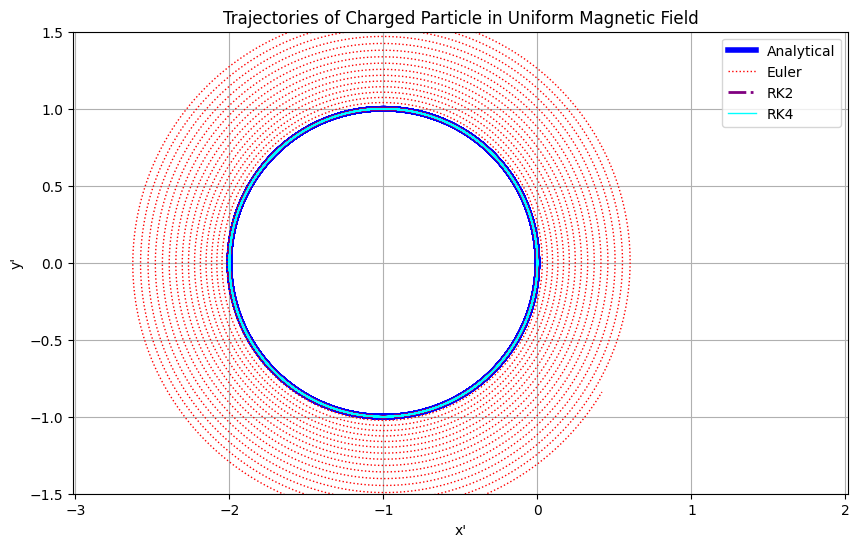

In [13]:
import numpy as np
import matplotlib.pyplot as plt

rqm = -1 # An electron as test particle

# Define the dynamics function for a charged particle in a magnetic field
def charged_particle_dynamics(t, state, rqm):
    x, y, z, vx, vy, vz = state
    # Given B-field
    Bx, By, Bz = 0, 0, 1
    
    # Lorentz force calculations
    ax = rqm * (vy * Bz - vz * By)  # vy*Bz since Bx and By are zero
    ay = rqm * (vz * Bx - vx * Bz)  # -vx*Bz since Bx and By are zero
    az = 0  # Since Bx and By are zero
    
    return np.array([vx, vy, vz, ax, ay, az])

# Initial conditions: [x0, y0, z0, vx0, vy0, vz0]
initial_state = np.array([0, 0, 0, 0, 1, 0])

# Time parameters
dt = 0.01
N = 10000  # Simulate for a substantial time

# Make wrapper to pass rqm
def charged_particle_wrapper(t, state):
    return charged_particle_dynamics(t, state, rqm)

# Integrate and store
trajectories = {}
for method in ["Euler", "RK2", "RK4"]:
    T, S = dynamics_solve(charged_particle_wrapper, Dim=6, t_0=0, s_0=initial_state, dt=dt, N=N, method=method)
    trajectories[method] = S

# Compute the analytical solution
omega = rqm
v0 = 1  # Initial y-velocity
x_analytical = 1 * np.sin(omega * T) - 1 # - 1 for x(t=0) = 0 (this is just changing constant of integration C for x(t)
y_analytical = 1 * np.cos(omega * T)

# Plot trajectories
plt.figure(figsize=(10, 6))

# Plot analytical solution
plt.plot(x_analytical, y_analytical, color='blue', label='Analytical', linewidth=4.0)

# Plot numerical solutions with specific colors, line styles and widths
plt.plot(trajectories["Euler"][:, 0], trajectories["Euler"][:, 1], ':', color='red', label='Euler', linewidth=1.0)
plt.plot(trajectories["RK2"][:, 0], trajectories["RK2"][:, 1], '-.', color='purple', label='RK2', linewidth=2.0)
plt.plot(trajectories["RK4"][:, 0], trajectories["RK4"][:, 1], '-', color='cyan', label='RK4', linewidth=1.0)

plt.title("Trajectories of Charged Particle in Uniform Magnetic Field")
plt.xlabel("x'")
plt.ylabel("y'")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim([-1.5, 0.5])
plt.ylim([-1.5, 1.5])
plt.show()

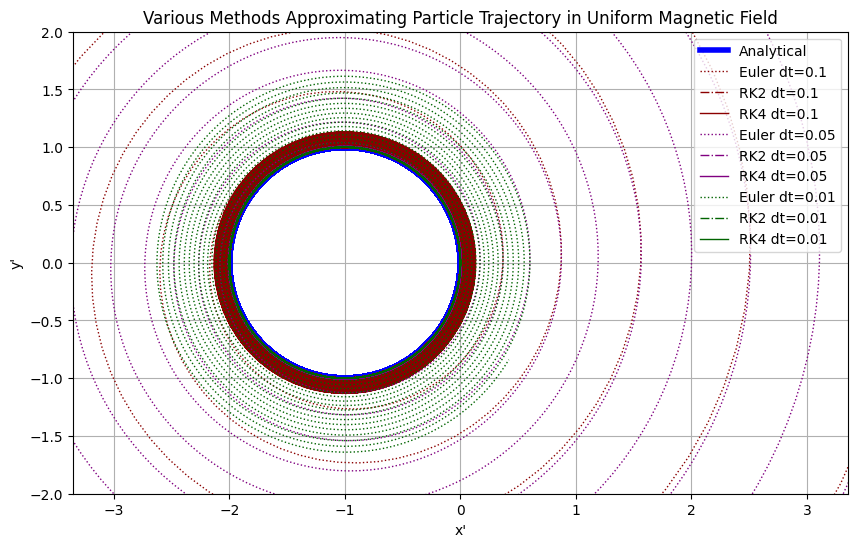

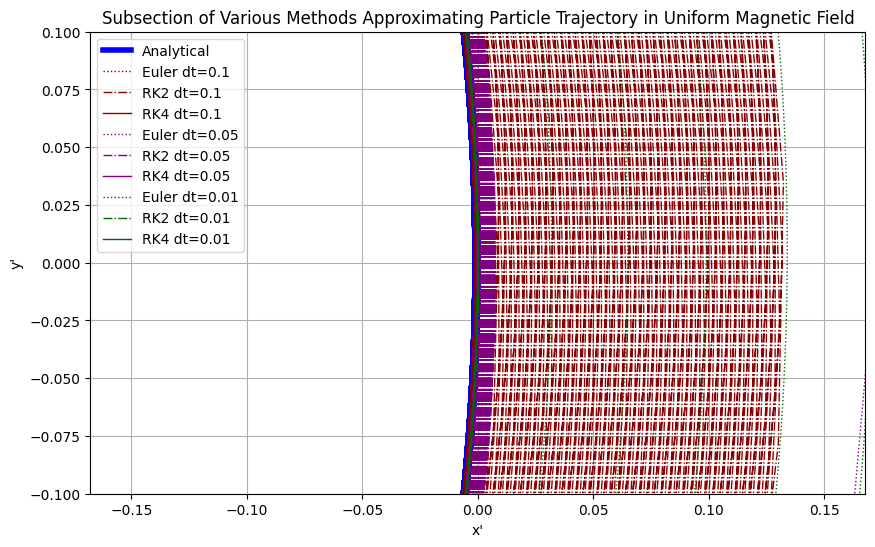

In [14]:
def charged_particle_dynamics(t, state, rqm):
    x, y, z, vx, vy, vz = state
    Bx, By, Bz = 0, 0, 1
    ax = rqm * (vy * Bz - vz * By)
    ay = rqm * (vz * Bx - vx * Bz)
    az = 0
    return np.array([vx, vy, vz, ax, ay, az])

initial_state = np.array([0, 0, 0, 0, 1, 0])

def charged_particle_wrapper(t, state):
    return charged_particle_dynamics(t, state, rqm)

dt_values = [0.1, 0.05, 0.01]
N = 10000
color_gradients = {
     "Euler": ["darkred", "purple", "darkgreen"], 
    "RK2": ["darkred", "purple", "darkgreen"], 
    "RK4": ["darkred", "purple", "darkgreen"]
}

omega = rqm
v0 = 1
T_max = N * max(dt_values)
T = np.linspace(0, T_max, N)

x_analytical = 1 * np.sin(omega * T) - 1
y_analytical = 1 * np.cos(omega * T)

plt.figure(figsize=(10, 6))
plt.plot(x_analytical, y_analytical, color='blue', label='Analytical', linewidth=4.0)

for idx, dt in enumerate(dt_values):
    trajectories = {}
    for method in ["Euler", "RK2", "RK4"]:
        T, S = dynamics_solve(charged_particle_wrapper, Dim=6, t_0=0, s_0=initial_state, dt=dt, N=N, method=method)
        trajectories[method] = S
        
        if method == "Euler":
            linestyle = ':'
        elif method == "RK2":
            linestyle = '-.'
        else:
            linestyle = '-'
        
        plt.plot(trajectories[method][:, 0], trajectories[method][:, 1], linestyle, color=color_gradients[method][idx], label=f'{method} dt={dt}', linewidth=1.0)

plt.title("Various Methods Approximating Particle Trajectory in Uniform Magnetic Field")
plt.xlabel("x'")
plt.ylabel("y'")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x_analytical, y_analytical, color='blue', label='Analytical', linewidth=4.0)

for idx, dt in enumerate(dt_values):
    trajectories = {}
    for method in ["Euler", "RK2", "RK4"]:
        T, S = dynamics_solve(charged_particle_wrapper, Dim=6, t_0=0, s_0=initial_state, dt=dt, N=N, method=method)
        trajectories[method] = S
        
        if method == "Euler":
            linestyle = ':'
        elif method == "RK2":
            linestyle = '-.'
        else:
            linestyle = '-'
        
        plt.plot(trajectories[method][:, 0], trajectories[method][:, 1], linestyle, color=color_gradients[method][idx], label=f'{method} dt={dt}', linewidth=1.0)

plt.title("Subsection of Various Methods Approximating Particle Trajectory in Uniform Magnetic Field")
plt.xlabel("x'")
plt.ylabel("y'")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim([-0.1, 0.1])
plt.ylim([-0.1, 0.1])
plt.show()

*Here we see convergence towards the analytical solution as time step dt shrinks.The second plot zooms to a section of the the particles motion to better show how numerical solutions drift from the analytical solution and how decreasing time step dt, reduces the error, tightening the numerically calculated trajectory closer to the true analytical trajectory of the particle*

*As the numerically approximated trajectories evolves we see drift in the trajectory indicating that the particles motion is not conserved. We know however that this is due to calculation error and with good approximation we can see that the particles motion is approximately conserved*

### 2D
**Instructions:** 
Consider a spatially uniform electric and magnetic fields of the form:
𝐄′(𝑥′,𝑦′,𝑧′,𝑡′)=0.2 𝐞′𝐲𝐁′(𝑥′,𝑦′,𝑧′,𝑡′)=1 𝐞′𝐳,
.

Set  𝐯′(𝑡′=0)=1 𝐞′𝐲
  and Integrate the equation of motion numerically using the methods you implemented above (Euler, RK2, RK4) and compare the numerical results with theory. Verify the numerical convergence of each method by progressively decreasing the time step.

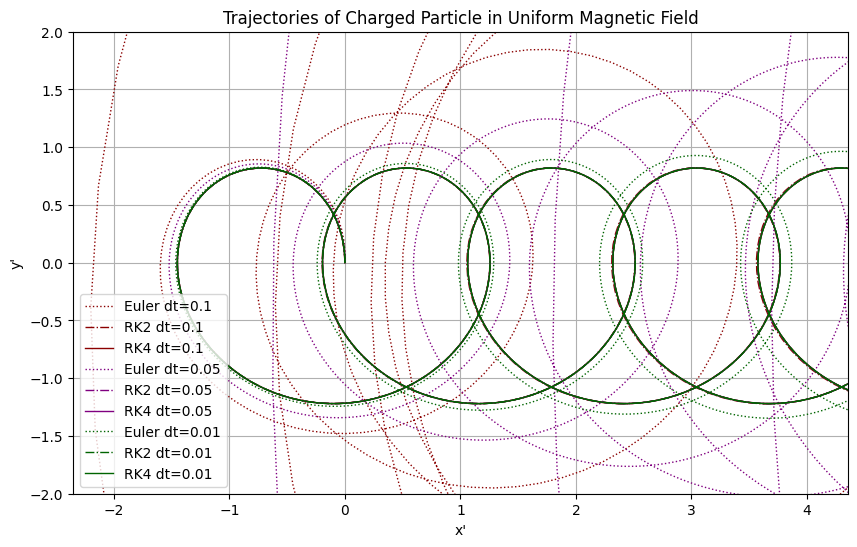

In [15]:
def charged_particle_dynamics(t, state, rqm):
    x, y, z, vx, vy, vz = state
    # Given E-field and B-field
    Ex, Ey, Ez = 0, 0.2, 0
    Bx, By, Bz = 0, 0, 1
    
    # Lorentz force calculations
    ax = rqm * (vy * Bz - vz * By) + rqm * Ex  # Added electric force component
    ay = rqm * (vz * Bx - vx * Bz) + rqm * Ey
    az = 0
    
    return np.array([vx, vy, vz, ax, ay, az])

# Initial conditions: [x0, y0, z0, vx0, vy0, vz0]
initial_state = np.array([0, 0, 0, 0, 1, 0])

def charged_particle_wrapper(t, state):
    return charged_particle_dynamics(t, state, rqm)

dt_values = [0.1, 0.05, 0.01]
N = 10000
color_gradients = {
     "Euler": ["darkred", "purple", "darkgreen"], 
    "RK2": ["darkred", "purple", "darkgreen"], 
    "RK4": ["darkred", "purple", "darkgreen"]
}

omega = rqm
v0 = 1
T_max = N * max(dt_values)
T = np.linspace(0, T_max, N)

plt.figure(figsize=(10, 6))

for idx, dt in enumerate(dt_values):
    trajectories = {}
    for method in ["Euler", "RK2", "RK4"]:
        T, S = dynamics_solve(charged_particle_wrapper, Dim=6, t_0=0, s_0=initial_state, dt=dt, N=N, method=method)
        trajectories[method] = S
        
        if method == "Euler":
            linestyle = ':'
        elif method == "RK2":
            linestyle = '-.'
        else:
            linestyle = '-'
        
        plt.plot(trajectories[method][:, 0], trajectories[method][:, 1], linestyle, color=color_gradients[method][idx], label=f'{method} dt={dt}', linewidth=1.0)

plt.title("Trajectories of Charged Particle in Uniform Magnetic Field")
plt.xlabel("x'")
plt.ylabel("y'")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim([-2, 4])
plt.ylim([-2, 2])
plt.show()

*In theory we should observe spiral motion. We see that with small time steps numerical solutions converge towards this continuous spiral motion. Accuaracy is greatest with RK4, then RK2, then Euler as expected and with any method, the use of larger time steps reduces acuaracy causing drift.*

*More importantly, the RK methods and forward Euler method are unstable causing the amplitude of the oscilation to grow as we advance through time steps. For tracking the trajectory of particles in cases where we want to conserve the special symmetries of the particles motion, a time reversible stable method is preffered. We could opt to use the Leap Frog (or Verlet)method instead.*